In [1]:
import xarray as xr
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys

path = '/home/akazemi3/Desktop/MB_Lab_Project/'
sys.path.append(path)
from analysis.neural_data_regression.tools.regression import *

from tools.processing import *
from tools.loading import *

import pandas as pd
import seaborn as sns

ROOT_PATH = '/data/atlas/model_scores'
BEST_ALPHA_PATH = '/data/atlas/regression_alphas'    
RESULTS_PATH = '' 

In [2]:
def results_best_alpha(model_dict, dataset, regions, mode):



    
    df = pd.DataFrame()
    index = 0
    


    for region in regions:
        
        for model_name, model_info in model_dict.items():
       
            if model_info["alpha_file_name"] == None:
                alpha=0
            else:
                file = open(os.path.join(BEST_ALPHA_PATH,f'{model_info["alpha_file_name"]}_{dataset}_{region}'),'rb')
                best_alphas = pickle.load(file)
                alpha = best_alphas[model_name]
            
            regression_model = Ridge(alpha=alpha)

            identifier = model_name + '_' + region + '_' + mode + '_' + f'Ridge(alpha={alpha})' 

            data = xr.open_dataset(os.path.join(ROOT_PATH,f'{identifier}'))
            r_mean = np.mean(data.r_value.values)
            
            df_tmp =  pd.DataFrame({'mean_score': r_mean,
                                    'model': model_info['name'],
                                    'pcs': model_info['pcs'],
                                    'alpha': alpha,
                                    'region':region}, index=[index])    

            df = pd.concat([df,df_tmp])
            index += 1    

    return df



def plot_best_alpha(df,file_name,dataset):
        
    
    fig = plt.figure(figsize=(8,4),dpi=200)
    

    sns.scatterplot(x=df.pcs,y=df.mean_score,hue=df.alpha,label='_nolegend_')
    sns.lineplot(x=df.pcs,y=df.mean_score,hue=df.model)#,marker='o')        

    
    plt.xlabel(xlabel='model')
    #plt.yscale('log')
    plt.ylabel(ylabel='Correlation (Pearson r)')        
    
    if file_name is not None:
        plt.savefig(os.path.join(RESULTS_PATH,f'{file_name}_{dataset}.png'))
    
    plt.legend()

In [21]:
def plotByRegion(regions,dataset,mode='test',file_name=None):
        
    
    name = '3 Layer Model 10k'
    alpha_file_name = 'model_3L_nsd_pca'
    model_dict = {
            f'model_3L_10000_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_1000':{'name':name,'pcs':'1000','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_5000':{'name':name,'pcs':'5000','alpha_file_name':alpha_file_name},
            #f'model_3L_10000_nsd_pca_{dataset}_10000':{'name':name,'pcs':'10000','alpha_file_name':alpha_file_name},
    }
    df_model_3L = results_best_alpha(model_dict, dataset, regions, mode)

    
    name = '3 Layer Model 10k mp'
    alpha_file_name = 'model_3L_mp_nsd_pca'
    model_dict = {
            f'model_3L_mp_10000_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'model_3L_mp_10000_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'model_3L_mp_10000_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
            f'model_3L_mp_10000_nsd_pca_{dataset}_1000':{'name':name,'pcs':'1000','alpha_file_name':alpha_file_name},
            f'model_3L_mp_10000_nsd_pca_{dataset}_5000':{'name':name,'pcs':'5000','alpha_file_name':alpha_file_name},
            #f'model_3L_mp_10000_nsd_pca_{dataset}_10000':{'name':name,'pcs':'10000','alpha_file_name':alpha_file_name},
    }
    df_model_3L_mp = results_best_alpha(model_dict, dataset, regions, mode)

      
    
    
    name = 'Alexnet Untrained Wide'
    alpha_file_name = 'alexnet_untrained_wide_nsd_pca'
    model_dict = {
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_1000':{'name':name,'pcs':'1000','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_5000':{'name':name,'pcs':'5000','alpha_file_name':alpha_file_name},
#            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_10000':{'name':name,'pcs':'10000','alpha_file_name':alpha_file_name},
    }
    df_u_alexnet_wide = results_best_alpha(model_dict, dataset, regions, mode)

    
    name = 'Alexnet Untrained Wide mp'
    alpha_file_name = 'alexnet_untrained_wide_mp_nsd_pca'
    model_dict = {
            f'alexnet_untrained_wide_mp_10000_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_mp_10000_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_mp_10000_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_mp_10000_nsd_pca_{dataset}_1000':{'name':name,'pcs':'1000','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_mp_10000_nsd_pca_{dataset}_5000':{'name':name,'pcs':'5000','alpha_file_name':alpha_file_name},
    }
    df_u_alexnet_wide_mp = results_best_alpha(model_dict, dataset, regions, mode)

    
    plot_best_alpha(pd.concat([
                                df_model_3L,
                              df_model_3L_mp,
                               df_u_alexnet_wide_mp,
                               df_u_alexnet_wide]),file_name=file_name,dataset=dataset)


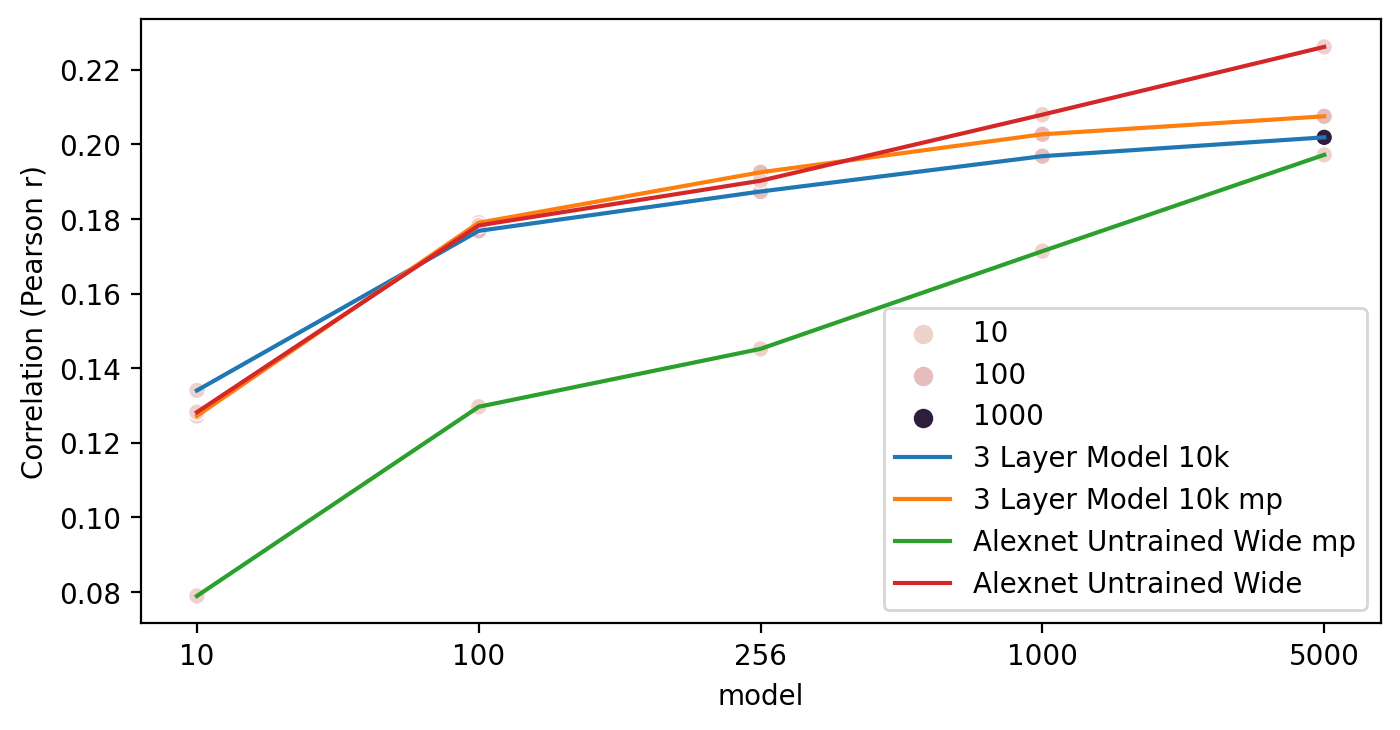

In [22]:
plotByRegion(['V4'],dataset='naturalscenes_zscored_processed',file_name=None)

In [ ]:
alexnet_untrained_wide_10000_nsd_pca_naturalscenes_zscored_processed_1000_V4_test_Ridge(alpha=0)

In [ ]:
def plotByRegion(regions,dataset,mode='test',file_name=None):
        
    
    name = '3 Layer Model'
    alpha_file_name = 'alexnet_nsd_pca'
    model_dict = {
            f'model_3L_10000_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_1000':{'name':name,'pcs':'1000','alpha_file_name':alpha_file_name},
            f'model_3L_10000_nsd_pca_{dataset}_5000':{'name':name,'pcs':'5000','alpha_file_name':alpha_file_name},
    }
    df_model_3L = results_best_alpha(model_dict, dataset, regions, mode)

    
    
    name = 'Alexnet Untrained Wide'
    alpha_file_name = None
    model_dict = {
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_1000':{'name':name,'pcs':'1000','alpha_file_name':alpha_file_name},
            f'alexnet_untrained_wide_10000_nsd_pca_{dataset}_5000':{'name':name,'pcs':'5000','alpha_file_name':alpha_file_name},
    }
    df_u_alexnet_wide = results_best_alpha(model_dict, dataset, regions, mode)

    
    name = 'Alexnet'
    alpha_file_name = None
    model_dict = {
            f'alexnet_nsd_pca_{dataset}_10':{'name':name,'pcs':'10','alpha_file_name':alpha_file_name},
            f'alexnet_nsd_pca_{dataset}_100':{'name':name,'pcs':'100','alpha_file_name':alpha_file_name},
            f'alexnet_nsd_pca_{dataset}_256':{'name':name,'pcs':'256','alpha_file_name':alpha_file_name},
    }
    df_alexnet = results_best_alpha(model_dict, dataset, regions, mode)

    
    plot_best_alpha(pd.concat([df_model_3L,df_alexnet,df_u_alexnet_wide]),file_name=file_name,dataset=dataset)


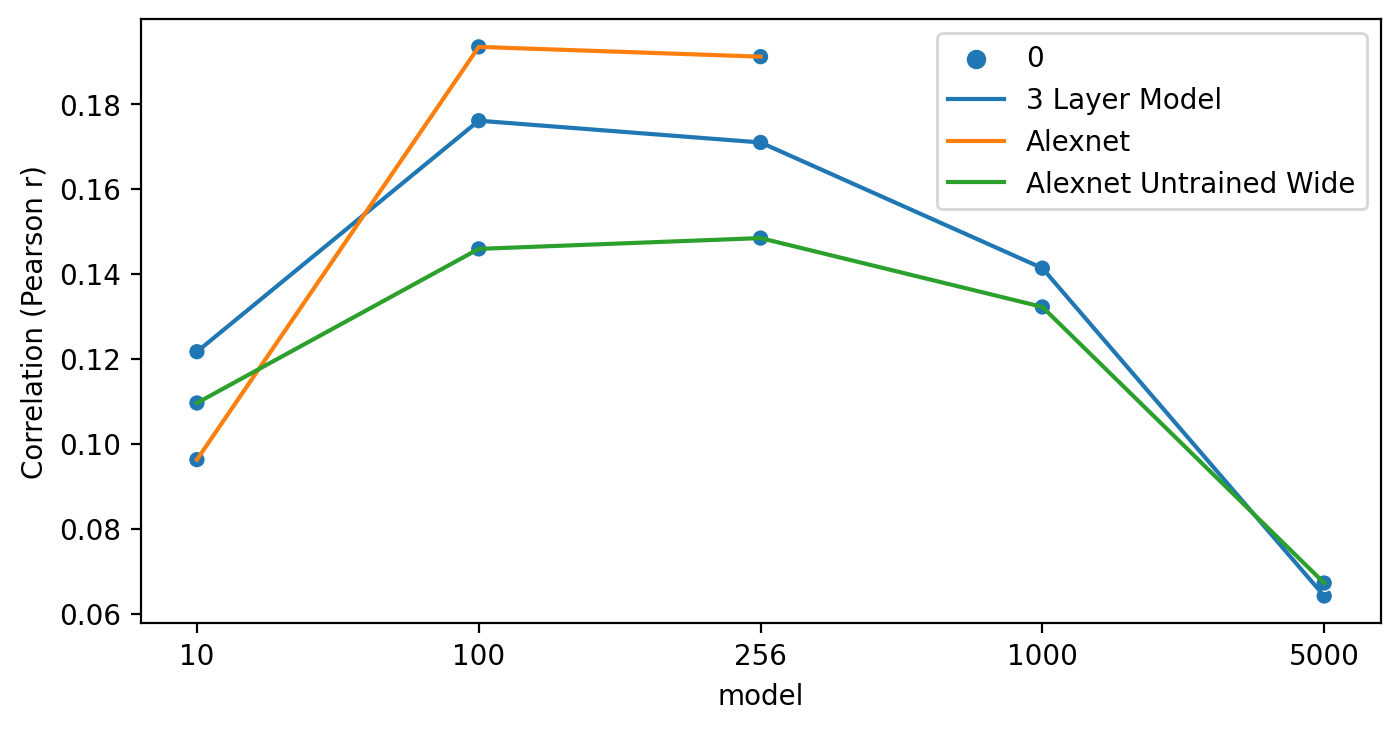

In [39]:
plotByRegion(['V4'],dataset='naturalscenes_zscored_processed',file_name='pca_results_maxpool')

In [50]:
df_model_3L

,mean_score,model,pcs,alpha,region
0,0.170942,3 Layer Model,256,0,V4


In [ ]:
def results_best_alpha_cnn_layerwise(models, dataset,regions, layers):

    
    root_path = '/data/atlas/model_scores'
    df_max_alphas = pd.read_csv(f'/home/akazemi3/Desktop/MB_Lab_Project/analysis/neural_data_regression/max_alphas_cnns_{dataset}_mp_layerwise.csv')
    dict_max_alphas = df_max_alphas.set_index(['region','model']).to_dict()['alpha']

    
    df = pd.DataFrame()
    index = 0
    
        
    for model in models:
        for region in regions:

                

            for layer in layers:
                alpha = dict_max_alphas[(region, f'{model}_{layer}')]
                regression_model = f'Ridge(alpha={alpha})'

                identifier = model + '_' + dataset + '_' + layer + '_' + region + '_' + regression_model


                data = xr.open_dataset(os.path.join(root_path,f'{identifier}'))
                r_values = data.where(data.region == region,drop=True).r_value.values
                mean_r = np.mean(r_values)
                df_tmp =  pd.DataFrame({'mean_score':mean_r,
                                        'alpha':alpha,
                                        'model':f'{model}_{layer}',
                                        'region':region},index=[index])    

                df = pd.concat([df,df_tmp])
                index += 1    
    
    return df

def plot_best_alpha_layerwise(df,file_name,dataset):
        
    
    fig = plt.figure(figsize=(8,4),dpi=200)
    

    sns.scatterplot(x=df.region,y=df.mean_score,hue=df.model)
    
    plt.ylabel(ylabel='Correlation (Pearson r)')        
    
    plt.savefig(f'/home/akazemi3/Desktop/MB_Lab_Project/results/parameter_study/{file_name}_{dataset}.png')

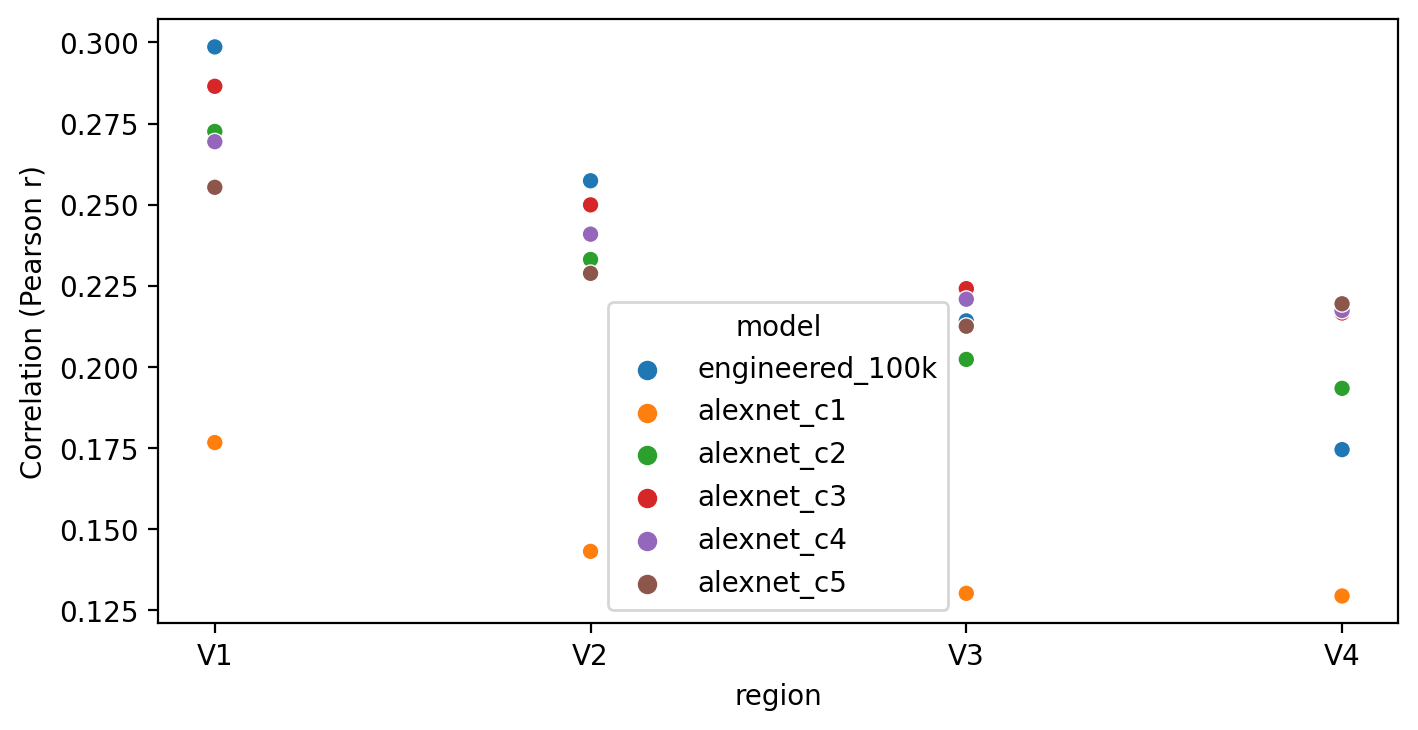

In [100]:
dataset = 'naturalscenes_zscored_processed'
regions = ['V1','V2','V3','V4']


models = f'model_final_mp'
features_range = (5,5)
df_model = results_best_alpha(models, features_range, dataset,regions)


cnn_models = ['alexnet_mp']
df_cnn = results_best_alpha_cnn_layerwise(cnn_models,dataset,regions,layers)

df = pd.concat([df_model,df_cnn])
df.model = df.model.map({'model_final_mp_100000':'engineered_100k',
                             'alexnet_mp_features.2':'alexnet_c1',
                               'alexnet_mp_features.5':'alexnet_c2',
                               'alexnet_mp_features.7':'alexnet_c3',
                               'alexnet_mp_features.9':'alexnet_c4',
                               'alexnet_mp_features.12':'alexnet_c5'})

file_name = f'best_alpha_all_models_naturalscenes_layerwise'
plot_best_alpha_layerwise(df,file_name,dataset)

In [2]:
import torch
w_l = []
f = torch.rand(4,1,3,3)
for i in range(3):
    w_l.append(f)
weight = torch.concat(w_l,dim=1)